In [75]:
import os
os.environ["TFF_CPP_MIN_LOG_LEVEL"]="2"

In [76]:
# importing tensorflow and keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models,layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from tensorflow.keras.utils import to_categorical, plot_model3

In [77]:
#load data and dplit
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [78]:
# Defining array. Each item of array represent integer value of labels. 10 clothing item for 10 integer label.

class_names =['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(class_names)

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


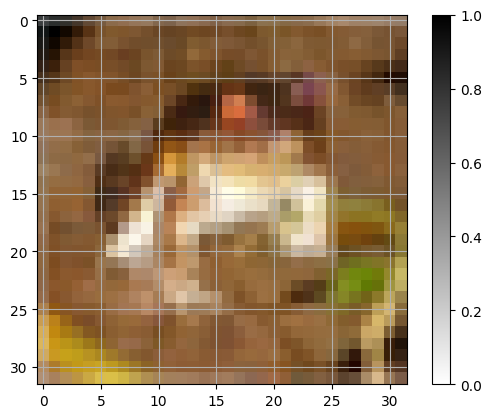

In [79]:
# example in the set
index=0 # change this number 
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.colorbar() 
plt.grid(True) 
plt.show()


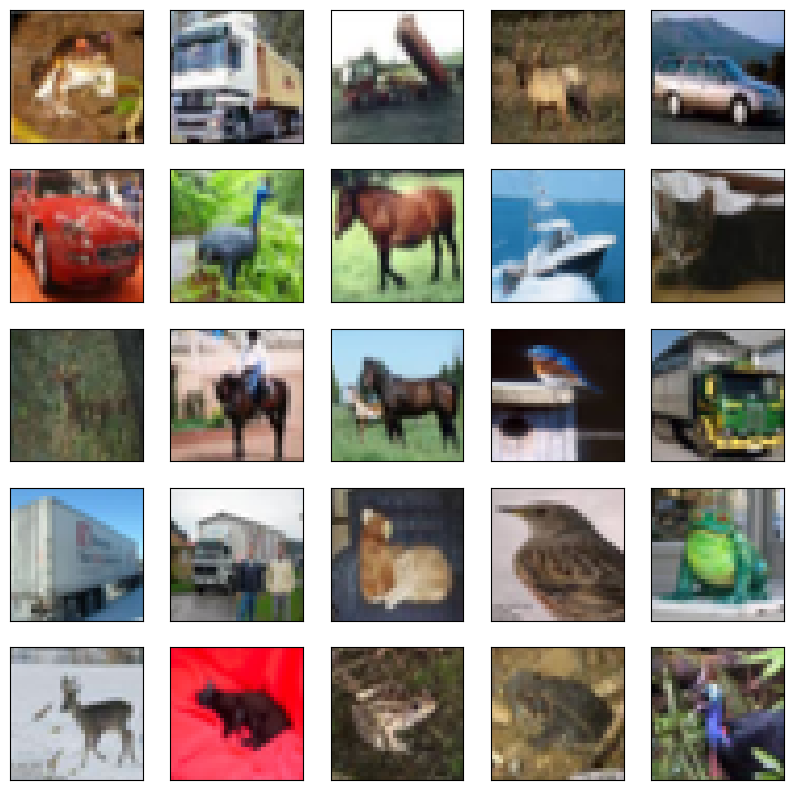

In [80]:
# display the first 25 images from traing set

plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary) 
plt.show()

In [81]:
# # onehot-encoding
# y_train=to_categorical(y_train)
# y_test=to_categorical(y_test)

In [82]:
#defining cnn model
inputs=keras.Input(shape=(32,32,3))
x=layers.Conv2D(32,3,activation="relu",padding="valid",name="conv1")(inputs)
x = layers.BatchNormalization()(x)
x=layers.Conv2D(64,3,activation="relu",padding="valid",name="conv2")(x)
x = layers.BatchNormalization()(x)
x=layers.MaxPooling2D()(x)
x=layers.Dropout(.4)(x)

x=layers.Conv2D(128,3,activation="relu",padding="valid",name="conv3")(x)
x = layers.BatchNormalization()(x)
x=layers.Conv2D(128,3,activation="relu",padding="valid",name="conv4")(x)
x = layers.BatchNormalization()(x)
x=layers.MaxPooling2D()(x)
x=layers.Dropout(.4)(x)

x=layers.Flatten()(x)
x=layers.Dense(64,activation="relu",name="fc1")(x)
outputs=layers.Dense(10,name="fc2")(x)

In [83]:
model=keras.Model(inputs=inputs,outputs=outputs)

In [84]:
# see the model structure
print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_22 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2 (Conv2D)              (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_23 (Ba  (None, 28, 28, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)        0   

In [85]:
#model compile
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=.001),
    metrics=["accuracy"]
)

In [86]:
# model fit
history=model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=2)

Epoch 1/10
782/782 - 192s - loss: 1.4477 - accuracy: 0.4833 - 192s/epoch - 246ms/step
Epoch 2/10
782/782 - 189s - loss: 0.9878 - accuracy: 0.6516 - 189s/epoch - 241ms/step
Epoch 3/10
782/782 - 188s - loss: 0.8296 - accuracy: 0.7055 - 188s/epoch - 240ms/step
Epoch 4/10
782/782 - 186s - loss: 0.7379 - accuracy: 0.7389 - 186s/epoch - 238ms/step
Epoch 5/10
782/782 - 185s - loss: 0.6726 - accuracy: 0.7648 - 185s/epoch - 237ms/step
Epoch 6/10
782/782 - 182s - loss: 0.6117 - accuracy: 0.7848 - 182s/epoch - 233ms/step
Epoch 7/10
782/782 - 187s - loss: 0.5708 - accuracy: 0.7987 - 187s/epoch - 239ms/step
Epoch 8/10
782/782 - 187s - loss: 0.5281 - accuracy: 0.8148 - 187s/epoch - 239ms/step
Epoch 9/10
782/782 - 185s - loss: 0.4914 - accuracy: 0.8289 - 185s/epoch - 237ms/step
Epoch 10/10
782/782 - 185s - loss: 0.4691 - accuracy: 0.8341 - 185s/epoch - 237ms/step


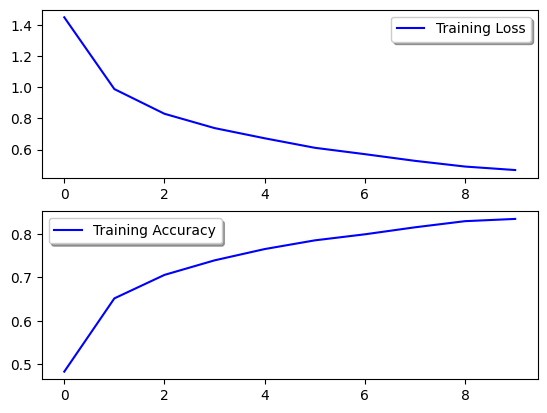

In [88]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [90]:
#model evaluate
model.evaluate(x_test,y_test,batch_size=64,verbose=2)

157/157 - 7s - loss: 0.6272 - accuracy: 0.7879 - 7s/epoch - 48ms/step


[0.627231776714325, 0.7878999710083008]

In [91]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [93]:
# predicting labels for image
predictions=model.predict(x_test)
for i in range(5):
    print(f"for prediction \n {predictions[i]},\n max value at index \n{np.argmax(predictions[i])},\n actual label \n{y_test[0]}")


313/313 [==============================] - 8s 26ms/step
for prediction 
 [-0.06692165 -1.2241921   2.1047733   6.158525    1.2110254   4.4009314
  2.7858748   0.60875344 -0.5795203  -0.11468711],
 max value at index 
3,
 actual label 
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
for prediction 
 [ -2.363311    3.873349  -10.252299   -8.461496  -12.592012  -11.487234
 -11.9558525 -13.235356    5.8839006  -2.8981898],
 max value at index 
8,
 actual label 
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
for prediction 
 [ -3.810169    2.2511284  -7.776237   -7.0432067 -10.204384   -8.688339
  -9.422079   -9.986383    2.8072155  -0.4151296],
 max value at index 
8,
 actual label 
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
for prediction 
 [ 7.0698924   1.8152437   1.3307759   1.6151657   0.16297585 -0.8678551
 -2.7282648  -2.9672918   5.088368   -0.8683381 ],
 max value at index 
0,
 actual label 
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
for prediction 
 [-2.2972207 -1.3254613  5.575506   4.6564236  5.1008186  1.1817619
  8.7744

In [94]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  if predicted_label == true_label: 
    color='blue'
  else:
    color='red' # wrong then red colour

In [95]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

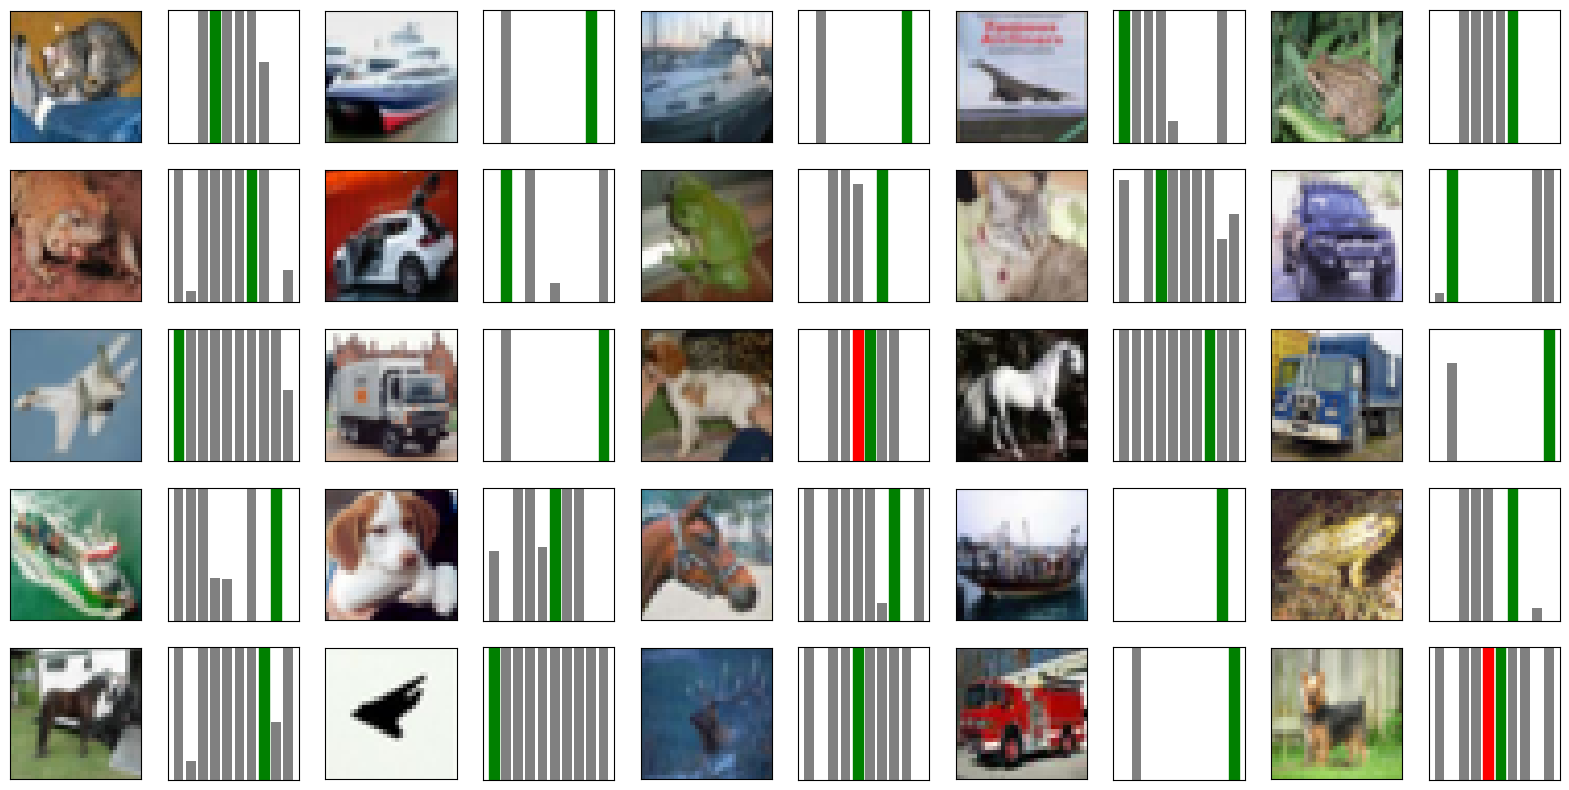

In [96]:
# verification of several image

num_rows=5
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()